In [191]:
library(ggplot2)
library(tidyverse)
library(reshape2)
library(hrbrthemes)
library(RColorBrewer)
library(plyr) 
library(zoo)
library(viridis)
library(ggnewscale)

In [192]:
zscore <- function(x, na.rm = FALSE) (x - mean(x, na.rm = na.rm)) / sd(x, na.rm)

In [193]:
data <- read.table('vol_sub-R001.csv', sep='\t', header=T)

In [194]:
data

Measure.volume,Left.Cerebral.White.Matter,Left.Lateral.Ventricle,Left.Inf.Lat.Vent,Left.Cerebellum.White.Matter,Left.Cerebellum.Cortex,Left.Thalamus.Proper,Left.Caudate,Left.Putamen,Left.Pallidum,⋯,ctx.rh.precuneus,ctx.rh.rostralanteriorcingulate,ctx.rh.rostralmiddlefrontal,ctx.rh.superiorfrontal,ctx.rh.superiorparietal,ctx.rh.superiortemporal,ctx.rh.supramarginal,ctx.rh.transversetemporal,ctx.rh.insula,eTIV
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
ses-01,201895.2,7060.4,529.5,13221.2,55868.3,7515.4,4275.2,4996.3,2054.2,⋯,14087.3,2898.2,11818.9,31416.3,11736.1,17778.1,10855.3,959.1,7241.4,1528229


In [195]:
data <-  data %>% mutate(ids = paste('sub-001_',Measure.volume)) %>% mutate(sex='F', age=c(2360/365)) %>%select(-c(Measure.volume))

In [196]:
names(data)

[1] "Left.Cerebral.White.Matter"      "Left.Lateral.Ventricle"         
  [3] "Left.Inf.Lat.Vent"               "Left.Cerebellum.White.Matter"   
  [5] "Left.Cerebellum.Cortex"          "Left.Thalamus.Proper"           
  [7] "Left.Caudate"                    "Left.Putamen"                   
  [9] "Left.Pallidum"                   "X3rd.Ventricle"                 
 [11] "X4th.Ventricle"                  "Brain.Stem"                     
 [13] "Left.Hippocampus"                "Left.Amygdala"                  
 [15] "CSF"                             "Left.Accumbens.area"            
 [17] "Left.VentralDC"                  "Left.choroid.plexus"            
 [19] "Right.Cerebral.White.Matter"     "Right.Lateral.Ventricle"        
 [21] "Right.Inf.Lat.Vent"              "Right.Cerebellum.White.Matter"  
 [23] "Right.Cerebellum.Cortex"         "Right.Thalamus.Proper"          
 [25] "Right.Caudate"                   "Right.Putamen"                  
 [27] "Right.Pallidum"                  "Right.Hippocampus"              
 [29] "Right.Amygdala"                  "Right.Accumbens.area"           
 [31] "Right.VentralDC"                 "Right.choroid.plexus"           
 [33] "WM.hypointensities"              "CC_Posterior"                   
 [35] "CC_Mid_Posterior"                "CC_Central"                     
 [37] "CC_Mid_Anterior"                 "CC_Anterior"                    
 [39] "ctx.lh.caudalanteriorcingulate"  "ctx.lh.caudalmiddlefrontal"     
 [41] "ctx.lh.cuneus"                   "ctx.lh.entorhinal"              
 [43] "ctx.lh.fusiform"                 "ctx.lh.inferiorparietal"        
 [45] "ctx.lh.inferiortemporal"         "ctx.lh.isthmuscingulate"        
 [47] "ctx.lh.lateraloccipital"         "ctx.lh.lateralorbitofrontal"    
 [49] "ctx.lh.lingual"                  "ctx.lh.medialorbitofrontal"     
 [51] "ctx.lh.middletemporal"           "ctx.lh.parahippocampal"         
 [53] "ctx.lh.paracentral"              "ctx.lh.parsopercularis"         
 [55] "ctx.lh.parsorbitalis"            "ctx.lh.parstriangularis"        
 [57] "ctx.lh.pericalcarine"            "ctx.lh.postcentral"             
 [59] "ctx.lh.posteriorcingulate"       "ctx.lh.precentral"              
 [61] "ctx.lh.precuneus"                "ctx.lh.rostralanteriorcingulate"
 [63] "ctx.lh.rostralmiddlefrontal"     "ctx.lh.superiorfrontal"         
 [65] "ctx.lh.superiorparietal"         "ctx.lh.superiortemporal"        
 [67] "ctx.lh.supramarginal"            "ctx.lh.transversetemporal"      
 [69] "ctx.lh.insula"                   "ctx.rh.caudalanteriorcingulate" 
 [71] "ctx.rh.caudalmiddlefrontal"      "ctx.rh.cuneus"                  
 [73] "ctx.rh.entorhinal"               "ctx.rh.fusiform"                
 [75] "ctx.rh.inferiorparietal"         "ctx.rh.inferiortemporal"        
 [77] "ctx.rh.isthmuscingulate"         "ctx.rh.lateraloccipital"        
 [79] "ctx.rh.lateralorbitofrontal"     "ctx.rh.lingual"                 
 [81] "ctx.rh.medialorbitofrontal"      "ctx.rh.middletemporal"          
 [83] "ctx.rh.parahippocampal"          "ctx.rh.paracentral"             
 [85] "ctx.rh.parsopercularis"          "ctx.rh.parsorbitalis"           
 [87] "ctx.rh.parstriangularis"         "ctx.rh.pericalcarine"           
 [89] "ctx.rh.postcentral"              "ctx.rh.posteriorcingulate"      
 [91] "ctx.rh.precentral"               "ctx.rh.precuneus"               
 [93] "ctx.rh.rostralanteriorcingulate" "ctx.rh.rostralmiddlefrontal"    
 [95] "ctx.rh.superiorfrontal"          "ctx.rh.superiorparietal"        
 [97] "ctx.rh.superiortemporal"         "ctx.rh.supramarginal"           
 [99] "ctx.rh.transversetemporal"       "ctx.rh.insula"                  
[101] "eTIV"                            "ids"                            
[103] "sex"                             "age"

In [197]:
rdata <- data %>% mutate(Frontal = ctx.rh.caudalmiddlefrontal + 
                ctx.rh.lateralorbitofrontal +
                ctx.rh.medialorbitofrontal +
                ctx.rh.parsopercularis +
                ctx.rh.parsorbitalis +
                ctx.rh.parstriangularis +
                ctx.rh.precentral +
                ctx.rh.rostralmiddlefrontal +
                ctx.rh.superiorfrontal,
               Temporal = ctx.rh.entorhinal +
                 ctx.rh.fusiform +
                 ctx.rh.inferiortemporal +
                 ctx.rh.middletemporal +
                 ctx.rh.parahippocampal +
                 ctx.rh.superiortemporal +
                 ctx.rh.transversetemporal +
                 Right.Amygdala,
               Hippocampus = Right.Hippocampus,
               Frontal_Parietal = ctx.rh.paracentral,
               Parietal = ctx.rh.inferiorparietal +
                          ctx.rh.postcentral +
                          ctx.rh.precuneus +
                          ctx.rh.superiorparietal +
                          ctx.rh.supramarginal,
               Insula = ctx.rh.insula,
               Cingulate = ctx.rh.caudalanteriorcingulate +
                           ctx.rh.isthmuscingulate +
                           ctx.rh.posteriorcingulate +
                           ctx.rh.rostralanteriorcingulate,
               Occipital = ctx.rh.cuneus +
                           ctx.rh.lateraloccipital +
                           ctx.rh.lingual +
                           ctx.rh.pericalcarine,
               BasalGanglia = Right.Caudate + Right.Putamen +
                              Right.Pallidum + Right.Accumbens.area,
               Thalamus = Right.Thalamus.Proper,
               Cerebellum = Right.Cerebellum.White.Matter +
                            Right.Cerebellum.Cortex,
               CorpusCallosum = CC_Posterior + CC_Mid_Posterior + CC_Central + CC_Mid_Anterior + CC_Anterior,
               Ventricles = Right.Lateral.Ventricle + 
                            Right.Inf.Lat.Vent +
                            Right.choroid.plexus +
                            X3rd.Ventricle + X4th.Ventricle + CSF,
                VentralDC = Left.VentralDC + Right.VentralDC,
                WM = Right.Cerebral.White.Matter,
                Brainstem = Brain.Stem) %>%
    select(ids, age, sex, Frontal, Temporal, Hippocampus, Frontal_Parietal, Parietal, Insula, Cingulate, Occipital,, BasalGanglia,
           Thalamus, Cerebellum, CorpusCallosum, Ventricles, VentralDC, WM, Brainstem, eTIV)

In [198]:
ldata <- data %>% mutate(Frontal = ctx.lh.caudalmiddlefrontal + 
                ctx.lh.lateralorbitofrontal +
                ctx.lh.medialorbitofrontal +
                ctx.lh.parsopercularis +
                ctx.lh.parsorbitalis +
                ctx.lh.parstriangularis +
                ctx.lh.precentral +
                ctx.lh.rostralmiddlefrontal +
                ctx.lh.superiorfrontal,
               Temporal = ctx.lh.entorhinal +
                 ctx.lh.fusiform +
                 ctx.lh.inferiortemporal +
                 ctx.lh.middletemporal +
                 ctx.lh.parahippocampal +
                 ctx.lh.superiortemporal +
                 ctx.lh.transversetemporal +
                 Left.Amygdala,
               Hippocampus = Left.Hippocampus,
               Frontal_Parietal = ctx.lh.paracentral,
               Parietal = ctx.lh.inferiorparietal +
                          ctx.lh.postcentral +
                          ctx.lh.precuneus +
                          ctx.lh.superiorparietal +
                          ctx.lh.supramarginal,
               Insula = ctx.lh.insula,
               Cingulate = ctx.lh.caudalanteriorcingulate +
                           ctx.lh.isthmuscingulate +
                           ctx.lh.posteriorcingulate +
                           ctx.lh.rostralanteriorcingulate,
               Occipital = ctx.lh.cuneus +
                           ctx.lh.lateraloccipital +
                           ctx.lh.lingual +
                           ctx.lh.pericalcarine,
               BasalGanglia = Left.Caudate + Left.Putamen +
                              Left.Pallidum + Left.Accumbens.area,
               Thalamus = Left.Thalamus.Proper,
               Cerebellum = Left.Cerebellum.White.Matter +
                            Left.Cerebellum.Cortex,
               CorpusCallosum = CC_Posterior + CC_Mid_Posterior + CC_Central + CC_Mid_Anterior + CC_Anterior,
               Ventricles = Left.Lateral.Ventricle + 
                            Left.Inf.Lat.Vent +
                            Left.choroid.plexus +
                            X3rd.Ventricle + X4th.Ventricle + CSF,
                VentralDC = Left.VentralDC + Left.VentralDC,
                WM = Left.Cerebral.White.Matter,
                Brainstem = Brain.Stem) %>%
    select(ids, age, sex, Frontal, Temporal, Hippocampus, Frontal_Parietal, Parietal, Insula, Cingulate, Occipital,, BasalGanglia,
           Thalamus, Cerebellum, CorpusCallosum, Ventricles, VentralDC, WM, Brainstem, eTIV)

In [199]:
#rdata <- read.table('merged_table_sumROIs_right.csv', sep=',', header=T)

In [200]:
#ldata <- read.table('merged_table_sumROIs_left.csv', sep=',', header=T)

In [201]:
ldata

ids,age,sex,Frontal,Temporal,Hippocampus,Frontal_Parietal,Parietal,Insula,Cingulate,Occipital,BasalGanglia,Thalamus,Cerebellum,CorpusCallosum,Ventricles,VentralDC,WM,Brainstem,eTIV
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
sub-001_ ses-01,6.465753,F,82390.7,63713.6,4305.2,4511.2,67517.3,7194.6,10779.1,24012.5,11889.4,7515.4,69089.5,2460.7,12747.8,7592.8,201895.2,18423.8,1528229


In [202]:
rdata['LR']='R'
ldata['LR']='L'

In [203]:
head(rdata)

,ids,age,sex,Frontal,Temporal,Hippocampus,Frontal_Parietal,Parietal,Insula,Cingulate,⋯,BasalGanglia,Thalamus,Cerebellum,CorpusCallosum,Ventricles,VentralDC,WM,Brainstem,eTIV,LR
,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<chr>
1,sub-001_ ses-01,6.465753,F,93689.7,62360.7,4343.6,5134.1,66914.9,7241.4,11727,⋯,11659.3,7523.8,68706.5,2460.7,12454.5,7480.3,206278,18423.8,1528229,R


In [204]:
#rbind(rdata, ldata)

In [205]:
data_s <- rbind(rdata, ldata) #%>% write_csv('merged_table_sumROIs_LR.csv')
data_s

ids,age,sex,Frontal,Temporal,Hippocampus,Frontal_Parietal,Parietal,Insula,Cingulate,⋯,BasalGanglia,Thalamus,Cerebellum,CorpusCallosum,Ventricles,VentralDC,WM,Brainstem,eTIV,LR
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
sub-001_ ses-01,6.465753,F,93689.7,62360.7,4343.6,5134.1,66914.9,7241.4,11727.0,⋯,11659.3,7523.8,68706.5,2460.7,12454.5,7480.3,206278.0,18423.8,1528229,R
sub-001_ ses-01,6.465753,F,82390.7,63713.6,4305.2,4511.2,67517.3,7194.6,10779.1,⋯,11889.4,7515.4,69089.5,2460.7,12747.8,7592.8,201895.2,18423.8,1528229,L


In [206]:
# Normalize

In [207]:
data_norm_s <- data_s %>% mutate_at(vars(Frontal:Brainstem), ~./as.double(eTIV))

In [208]:
# NormalDB

In [209]:
normdata <- read.table('/home/orco/data/kinderseg/code/merged_table_sumROIs_LR_norm.csv', sep=',', header=T) %>% select(-c(X))

In [210]:
normdata %>% head()

,X.1,ids,age,sex,DB,Frontal,Temporal,Hippocampus,Frontal_Parietal,Parietal,⋯,BasalGanglia,Thalamus,Cerebellum,CorpusCallosum,Ventricles,VentralDC,WM,Brainstem,eTIV,LR
,<int>,<chr>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1,1,sub-NDARAA075AMK,6.728040,1,HBN,0.07346423,0.04506821,0.002508233,0.003088871,0.05234557,⋯,0.009018347,0.005310277,0.04654255,0.002609092,0.004784381,0.005279627,0.1428752,0.01248549,1402940,R
2,2,sub-NDARAE012DGA,6.927903,0,HBN,0.07349721,0.04964160,0.002651597,0.002751606,0.05035299,⋯,0.007638522,0.004920822,0.04420150,0.002847341,0.006243024,0.005069055,0.1449625,0.01194276,1403871,R
3,3,sub-NDARAM277WZT,14.320670,0,HBN,0.06399621,0.04566605,0.003012720,0.003027248,0.04189534,⋯,0.007334395,0.004825619,0.04820066,0.002065158,0.005952375,0.006120977,0.1371428,0.01423877,1397375,R
4,4,sub-NDARAP522AFK,11.612822,0,HBN,0.05974889,0.04392673,0.002873662,0.003318177,0.04375272,⋯,0.008304094,0.005040241,0.04766691,0.001972724,0.005719913,0.005401782,0.1473863,0.01314756,1612542,R
5,5,sub-NDARAT100AEQ,16.489276,0,HBN,0.05988411,0.03915961,0.002652050,0.002400167,0.03722434,⋯,0.007892394,0.005268438,0.04383775,0.002557057,0.005212763,0.005821656,0.1410429,0.01294955,1559058,R
6,6,sub-NDARAV610EY3,11.683550,0,HBN,0.06284938,0.04512072,0.002862270,0.002652043,0.04526314,⋯,0.008202508,0.004820204,0.04939252,0.002594146,0.005169559,0.005606061,0.1488621,0.01224354,1825649,R


In [211]:
data_s_tmp %>% head()

,ids,age,sex,eTIV,LR,ROI,Volume
,<chr>,<dbl>,<chr>,<int>,<chr>,<chr>,<dbl>
1,sub-001_ ses-01,6.465753,F,1528229,R,Frontal,0.061305930
2,sub-001_ ses-01,6.465753,F,1528229,L,Frontal,0.053912339
3,sub-001_ ses-01,6.465753,F,1528229,R,Temporal,0.040805861
4,sub-001_ ses-01,6.465753,F,1528229,L,Temporal,0.041691134
5,sub-001_ ses-01,6.465753,F,1528229,R,Hippocampus,0.002842244
6,sub-001_ ses-01,6.465753,F,1528229,L,Hippocampus,0.002817117


In [212]:
# data_s_tmp <- data_norm_s %>% 
#     gather(key='ROI',value='Volume', 'Frontal':'Brainstem')
# normdata_tmp <- normdata %>% 
#     gather(key='ROI',value='Volume', 'Frontal':'Brainstem')

# ggplot(normdata_tmp, aes(x=age, y=Volume, group=ROI, shape=LR)) +
#     geom_point(alpha=0.2) +
#     geom_smooth(method='lm', se=T, formula='y~x', color='blue') +
#     geom_point(data=data_s_tmp, aes(x=age, y=Volume, shape=LR), size=3, color='green') +
#     facet_wrap(vars(ROI), scales = "free") +
#     theme_bw() +
#     labs(x='age', y='Volume') +
#     theme(text = element_text(size=20))
#     #theme(legend.position = 'none')

In [213]:
# ggsave('./imgs/scatterplot_sub001.png', plot=last_plot(), width=600, height=300, units='mm')

In [214]:
# w=20

# data_s_tmp <- data_norm_s %>% 
#     gather(key='ROI',value='Volume', 'Frontal':'Brainstem')
# normdata_tmp <- normdata %>% 
#     gather(key='ROI',value='Volume', 'Frontal':'Brainstem')

# data_norm_p95R <- normdata %>% arrange(age) %>% filter(LR=='R') %>% mutate_at(vars(Frontal:Brainstem), rollapply, width=w, quantile, probs=0.95, fill=NA) %>% select(-c(ids)) %>% 
#     gather(key='ROI',value='Volume', 'Frontal':'Brainstem')

# data_norm_p95L <- normdata %>% arrange(age) %>% filter(LR=='L') %>% mutate_at(vars(Frontal:Brainstem), rollapply, width=w, quantile, probs=0.95, fill=NA) %>% select(-c(ids)) %>% 
#     gather(key='ROI',value='Volume', 'Frontal':'Brainstem')

# data_norm_p75R <- normdata %>% arrange(age) %>% filter(LR=='R') %>% mutate_at(vars(Frontal:Brainstem), rollapply, width=w, quantile, probs=0.75, fill=NA) %>% select(-c(ids)) %>% 
#     gather(key='ROI',value='Volume', 'Frontal':'Brainstem')

# data_norm_p75L <- normdata %>% arrange(age) %>% filter(LR=='L') %>% mutate_at(vars(Frontal:Brainstem), rollapply, width=w, quantile, probs=0.75, fill=NA) %>% select(-c(ids)) %>% 
#     gather(key='ROI',value='Volume', 'Frontal':'Brainstem')

# data_norm_p25R <- normdata %>% arrange(age) %>% filter(LR=='R') %>% mutate_at(vars(Frontal:Brainstem), rollapply, width=w, quantile, probs=0.25, fill=NA) %>% select(-c(ids)) %>% 
#     gather(key='ROI',value='Volume', 'Frontal':'Brainstem')

# data_norm_p25L <- normdata %>% arrange(age) %>% filter(LR=='L') %>% mutate_at(vars(Frontal:Brainstem), rollapply, width=w, quantile, probs=0.25, fill=NA) %>% select(-c(ids)) %>% 
#     gather(key='ROI',value='Volume', 'Frontal':'Brainstem')

# data_norm_p50R <- normdata %>% arrange(age) %>% filter(LR=='R') %>% mutate_at(vars(Frontal:Brainstem), rollapply, width=w, quantile, probs=0.50, fill=NA) %>% select(-c(ids)) %>% 
#     gather(key='ROI',value='Volume', 'Frontal':'Brainstem')

# data_norm_p50L <- normdata %>% arrange(age) %>% filter(LR=='L') %>% mutate_at(vars(Frontal:Brainstem), rollapply, width=w, quantile, probs=0.50, fill=NA) %>% select(-c(ids)) %>% 
#     gather(key='ROI',value='Volume', 'Frontal':'Brainstem')


# data_norm_p05L <- normdata %>% filter(LR=='L') %>% arrange(age) %>% mutate_at(vars(Frontal:Brainstem), rollapply, width=w, quantile, probs=0.05, fill=NA) %>% select(-c(ids)) %>% 
#     gather(key='ROI',value='Volume', 'Frontal':'Brainstem')

# data_norm_p05R <- normdata %>% filter(LR=='R') %>% arrange(age) %>% mutate_at(vars(Frontal:Brainstem), rollapply, width=w, quantile, probs=0.05, fill=NA) %>% select(-c(ids)) %>% 
#     gather(key='ROI',value='Volume', 'Frontal':'Brainstem')

# ggplot(normdata_tmp, aes(x=age, y=Volume, group=ROI, shape=LR)) +
#     geom_point(alpha=0.2) +
#     geom_point(data=data_s_tmp, aes(x=age, y=Volume, shape=LR), size=3, color='red') +
#     geom_line(data=data_norm_p50R, aes(x=age, y=Volume), color='lightblue') +
#     geom_line(data=data_norm_p95R, aes(x=age, y=Volume), color='lightblue') +
#     geom_line(data=data_norm_p05R, aes(x=age, y=Volume), color='lightblue') +
#     geom_line(data=data_norm_p50L, aes(x=age, y=Volume), color='blue') +
#     geom_line(data=data_norm_p95L, aes(x=age, y=Volume), color='blue') +
#     geom_line(data=data_norm_p05L, aes(x=age, y=Volume), color='blue') +
#     facet_wrap(vars(ROI), scales = "free") +
#     theme_bw() +
#     labs(x='age', y='Volume') +
#     theme(text = element_text(size=20))
#     #theme(legend.position = 'none')

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 912 rows containing non-finite values (new_stat_smooth).”


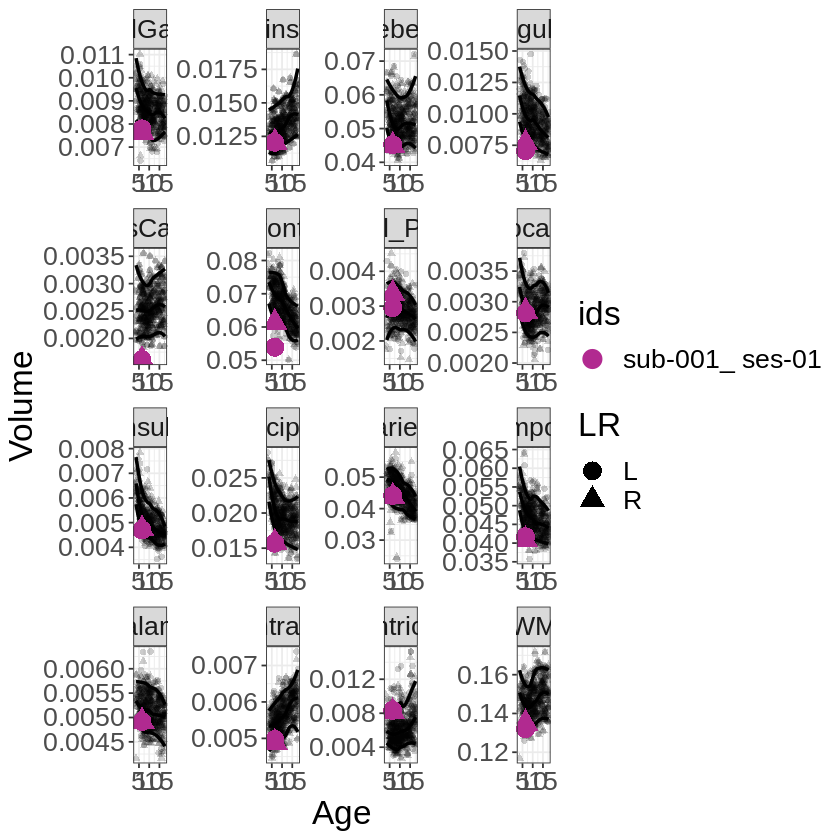

In [270]:
w=20

data_s_tmp <- data_norm_s %>% 
    gather(key='ROI',value='Volume', 'Frontal':'Brainstem')
normdata_tmp <- normdata %>% 
    gather(key='ROI',value='Volume', 'Frontal':'Brainstem')

data_norm_p95 <- normdata %>% arrange(age) %>% mutate_at(vars(Frontal:Brainstem), rollapply, width=w, quantile, probs=0.95, fill=NA) %>% select(-c(ids)) %>% 
    gather(key='ROI',value='Volume', 'Frontal':'Brainstem')

data_norm_p75 <- normdata %>% arrange(age) %>% mutate_at(vars(Frontal:Brainstem), rollapply, width=w, quantile, probs=0.75, fill=NA) %>% select(-c(ids)) %>% 
    gather(key='ROI',value='Volume', 'Frontal':'Brainstem')

data_norm_p25 <- normdata %>% arrange(age) %>% mutate_at(vars(Frontal:Brainstem), rollapply, width=w, quantile, probs=0.25, fill=NA) %>% select(-c(ids)) %>% 
    gather(key='ROI',value='Volume', 'Frontal':'Brainstem')

data_norm_p50 <- normdata %>% arrange(age) %>% mutate_at(vars(Frontal:Brainstem), rollapply, width=w, quantile, probs=0.50, fill=NA) %>% select(-c(ids)) %>% 
    gather(key='ROI',value='Volume', 'Frontal':'Brainstem')

data_norm_p05 <- normdata %>% arrange(age) %>% mutate_at(vars(Frontal:Brainstem), rollapply, width=w, quantile, probs=0.05, fill=NA) %>% select(-c(ids)) %>% 
    gather(key='ROI',value='Volume', 'Frontal':'Brainstem')

data_norm_perc <- rbind(data_norm_p95 %>% mutate(percentile=0.95),
                        data_norm_p50 %>% mutate(percentile=0.50))
data_norm_perc <- rbind(data_norm_perc,
                         data_norm_p05 %>% mutate(percentile=0.05))
data_norm_perc <- data_norm_perc %>% mutate(percentile=factor(percentile))

ggplot(normdata_tmp, aes(x=age, y=Volume, group=ROI, shape=LR)) +
    geom_point(alpha=0.2) +
#    geom_smooth(data=data_norm_p50, aes(x=age, y=Volume), se=F) +
#    geom_smooth(data=data_norm_p95, aes(x=age, y=Volume), se=F) +
#    geom_smooth(data=data_norm_p05, aes(x=age, y=Volume), se=F) +
geom_smooth(data=data_norm_perc, aes(x=age, y=Volume, group=percentile), color='black', se=F) +
scale_color_viridis_d(begin=0.4, end=0.8)+
new_scale_color()  +

geom_point(data=data_s_tmp, aes(x=age, y=Volume, shape=LR, color=ids), size=5) +
scale_color_viridis_d(option='plasma', begin=0.4, end=0.8)+

    facet_wrap(vars(ROI), scales = "free") +
    theme_bw() +
    labs(x='Age', y='Volume') +
    theme(text = element_text(size=20))
    #theme(legend.position = 'none')

In [266]:
ggsave('./imgs/percentile_scatterplot_sub001.png', plot=last_plot(), width=600, height=300, units='mm')

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 912 rows containing non-finite values (new_stat_smooth).”


In [271]:
#ggsave('./imgs/percentile_scatterplot_sub-R001.eps', plot=last_plot(), width=600, height=300, dpi=600, units='mm', device=cairo_ps)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 912 rows containing non-finite values (new_stat_smooth).”


In [217]:
data_s

ids,age,sex,Frontal,Temporal,Hippocampus,Frontal_Parietal,Parietal,Insula,Cingulate,⋯,BasalGanglia,Thalamus,Cerebellum,CorpusCallosum,Ventricles,VentralDC,WM,Brainstem,eTIV,LR
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
sub-001_ ses-01,6.465753,F,93689.7,62360.7,4343.6,5134.1,66914.9,7241.4,11727.0,⋯,11659.3,7523.8,68706.5,2460.7,12454.5,7480.3,206278.0,18423.8,1528229,R
sub-001_ ses-01,6.465753,F,82390.7,63713.6,4305.2,4511.2,67517.3,7194.6,10779.1,⋯,11889.4,7515.4,69089.5,2460.7,12747.8,7592.8,201895.2,18423.8,1528229,L


In [218]:
normdata %>% head()

,X.1,ids,age,sex,DB,Frontal,Temporal,Hippocampus,Frontal_Parietal,Parietal,⋯,BasalGanglia,Thalamus,Cerebellum,CorpusCallosum,Ventricles,VentralDC,WM,Brainstem,eTIV,LR
,<int>,<chr>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1,1,sub-NDARAA075AMK,6.728040,1,HBN,0.07346423,0.04506821,0.002508233,0.003088871,0.05234557,⋯,0.009018347,0.005310277,0.04654255,0.002609092,0.004784381,0.005279627,0.1428752,0.01248549,1402940,R
2,2,sub-NDARAE012DGA,6.927903,0,HBN,0.07349721,0.04964160,0.002651597,0.002751606,0.05035299,⋯,0.007638522,0.004920822,0.04420150,0.002847341,0.006243024,0.005069055,0.1449625,0.01194276,1403871,R
3,3,sub-NDARAM277WZT,14.320670,0,HBN,0.06399621,0.04566605,0.003012720,0.003027248,0.04189534,⋯,0.007334395,0.004825619,0.04820066,0.002065158,0.005952375,0.006120977,0.1371428,0.01423877,1397375,R
4,4,sub-NDARAP522AFK,11.612822,0,HBN,0.05974889,0.04392673,0.002873662,0.003318177,0.04375272,⋯,0.008304094,0.005040241,0.04766691,0.001972724,0.005719913,0.005401782,0.1473863,0.01314756,1612542,R
5,5,sub-NDARAT100AEQ,16.489276,0,HBN,0.05988411,0.03915961,0.002652050,0.002400167,0.03722434,⋯,0.007892394,0.005268438,0.04383775,0.002557057,0.005212763,0.005821656,0.1410429,0.01294955,1559058,R
6,6,sub-NDARAV610EY3,11.683550,0,HBN,0.06284938,0.04512072,0.002862270,0.002652043,0.04526314,⋯,0.008202508,0.004820204,0.04939252,0.002594146,0.005169559,0.005606061,0.1488621,0.01224354,1825649,R


In [219]:
lnormdata <- normdata %>% filter(LR=='L')
rnormdata <- normdata %>% filter(LR=='R')

In [220]:
age_min <- min(data_norm_s$age) -1
age_max <- max(data_norm_s$age) +1


znormdata <- rbind(lnormdata %>% filter(age > age_min & age <= age_max) %>%
dplyr::mutate(across(Frontal:Brainstem, zscore)),
                rnormdata %>% filter(age > age_min & age <= age_max) %>%
dplyr::mutate(across(Frontal:Brainstem, zscore)))

In [221]:
znormdata %>% head()

,X.1,ids,age,sex,DB,Frontal,Temporal,Hippocampus,Frontal_Parietal,Parietal,⋯,BasalGanglia,Thalamus,Cerebellum,CorpusCallosum,Ventricles,VentralDC,WM,Brainstem,eTIV,LR
,<int>,<chr>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1,278,sub-NDARAA075AMK,6.728040,1,HBN,0.3425768,-0.7490477,-1.45000685,-0.2218564,0.3573706,⋯,0.2717470,-0.09704282,-0.80753880,0.08461275,-0.32047023,-0.003836564,-0.1156461,-0.2610176,1402940,L
2,279,sub-NDARAE012DGA,6.927903,0,HBN,0.9360130,0.1161350,-0.03893677,0.6074303,0.6512758,⋯,-1.4831390,-0.80198342,-1.15433094,0.76143410,0.83808668,-0.915161417,0.2014206,-0.6750542,1403871,L
3,286,sub-NDARBN100LCD,6.088067,1,HBN,-0.4172376,-0.9209923,0.11698140,0.4379468,0.4581417,⋯,0.9096375,2.05274477,-0.04683636,-0.61433596,-0.66420718,0.143136650,-0.5093802,0.6508971,1158670,L
4,289,sub-NDARCE721YB5,6.682067,0,HBN,-1.0378069,-1.0389829,-0.74116577,0.8297077,0.9707080,⋯,-0.7336774,-0.95070711,-1.54226711,-1.87692045,-0.05348206,-1.924555805,-0.7599424,-0.5614468,1595791,L
5,292,sub-NDARCU891YET,5.704540,0,HBN,-0.6701923,-0.5762966,-0.14183875,-0.9466498,-0.9735524,⋯,-2.8779844,-0.66587995,-0.67291065,-1.14897465,-0.91820594,-1.046960493,-0.4628853,-0.6043962,1613027,L
6,294,sub-NDARCX053GU5,6.922427,1,HBN,-1.1237429,0.2493708,-0.72335425,-0.4446695,-0.9815565,⋯,-1.3153068,-0.04271749,-0.16813183,-0.06208655,-0.74729609,-0.013009577,-1.2199304,-0.3534271,1396546,L


In [222]:
lnormmeans <- lnormdata %>% dplyr::summarize(across(Frontal:Brainstem, mean))
lnormsd <- lnormdata %>% dplyr::summarize(across(Frontal:Brainstem, sd))

rnormmeans <- rnormdata %>% dplyr::summarize(across(Frontal:Brainstem, mean))
rnormsd <- rnormdata %>% dplyr::summarize(across(Frontal:Brainstem, sd))

In [223]:
zscore2 <- function(x, normmean, normsd, na.rm = FALSE) (x - normmean) / normsd

In [224]:
ldata_s <- data_norm_s %>% filter(LR=='L')
rdata_s <- data_norm_s %>% filter(LR=='R')

for (i in colnames(lnormsd)) {
    print(i)
    ldata_s[i] <- zscore2(ldata_s[i], unlist(lnormmeans[i]), unlist(lnormsd[i]))
    rdata_s[i] <- zscore2(rdata_s[i], unlist(rnormmeans[i]), unlist(rnormsd[i]))
    }


[1] "Frontal"
[1] "Temporal"
[1] "Hippocampus"
[1] "Frontal_Parietal"
[1] "Parietal"
[1] "Insula"
[1] "Cingulate"
[1] "Occipital"
[1] "BasalGanglia"
[1] "Thalamus"
[1] "Cerebellum"
[1] "CorpusCallosum"
[1] "Ventricles"
[1] "VentralDC"
[1] "WM"
[1] "Brainstem"


In [225]:
zdata_s <- rbind(ldata_s, rdata_s)
zdata_s

ids,age,sex,Frontal,Temporal,Hippocampus,Frontal_Parietal,Parietal,Insula,Cingulate,⋯,BasalGanglia,Thalamus,Cerebellum,CorpusCallosum,Ventricles,VentralDC,WM,Brainstem,eTIV,LR
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
sub-001_ ses-01,6.465753,F,-2.201181,-1.253626,-0.1423480,0.09107873,-0.07566062,-0.3806802,-2.6175846,⋯,-1.127656,-0.7728257,-1.259492,-2.639446,0.8983983,-1.520966,-1.621165,-1.056495,1528229,L
sub-001_ ses-01,6.465753,F,-1.004414,-1.289832,-0.1980309,1.03343429,-0.38088342,-0.6219822,-0.6912484,⋯,-1.422250,-0.4567758,-1.222177,-2.639446,1.0385652,-1.599447,-1.280962,-1.056495,1528229,R


In [226]:
library(ggforce)
library(cowplot)

In [227]:
# zdata_s %>%
# gather(key='rois',value='z_score', 'Frontal':'Brainstem')

In [228]:
znormdata %>% head()

,X.1,ids,age,sex,DB,Frontal,Temporal,Hippocampus,Frontal_Parietal,Parietal,⋯,BasalGanglia,Thalamus,Cerebellum,CorpusCallosum,Ventricles,VentralDC,WM,Brainstem,eTIV,LR
,<int>,<chr>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1,278,sub-NDARAA075AMK,6.728040,1,HBN,0.3425768,-0.7490477,-1.45000685,-0.2218564,0.3573706,⋯,0.2717470,-0.09704282,-0.80753880,0.08461275,-0.32047023,-0.003836564,-0.1156461,-0.2610176,1402940,L
2,279,sub-NDARAE012DGA,6.927903,0,HBN,0.9360130,0.1161350,-0.03893677,0.6074303,0.6512758,⋯,-1.4831390,-0.80198342,-1.15433094,0.76143410,0.83808668,-0.915161417,0.2014206,-0.6750542,1403871,L
3,286,sub-NDARBN100LCD,6.088067,1,HBN,-0.4172376,-0.9209923,0.11698140,0.4379468,0.4581417,⋯,0.9096375,2.05274477,-0.04683636,-0.61433596,-0.66420718,0.143136650,-0.5093802,0.6508971,1158670,L
4,289,sub-NDARCE721YB5,6.682067,0,HBN,-1.0378069,-1.0389829,-0.74116577,0.8297077,0.9707080,⋯,-0.7336774,-0.95070711,-1.54226711,-1.87692045,-0.05348206,-1.924555805,-0.7599424,-0.5614468,1595791,L
5,292,sub-NDARCU891YET,5.704540,0,HBN,-0.6701923,-0.5762966,-0.14183875,-0.9466498,-0.9735524,⋯,-2.8779844,-0.66587995,-0.67291065,-1.14897465,-0.91820594,-1.046960493,-0.4628853,-0.6043962,1613027,L
6,294,sub-NDARCX053GU5,6.922427,1,HBN,-1.1237429,0.2493708,-0.72335425,-0.4446695,-0.9815565,⋯,-1.3153068,-0.04271749,-0.16813183,-0.06208655,-0.74729609,-0.013009577,-1.2199304,-0.3534271,1396546,L


In [229]:
# z_normdata %>%
# gather(key='rois',value='z_score', 'Frontal':'Brainstem')

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Warning message:
“Removed 5 rows containing missing values (geom_point).”


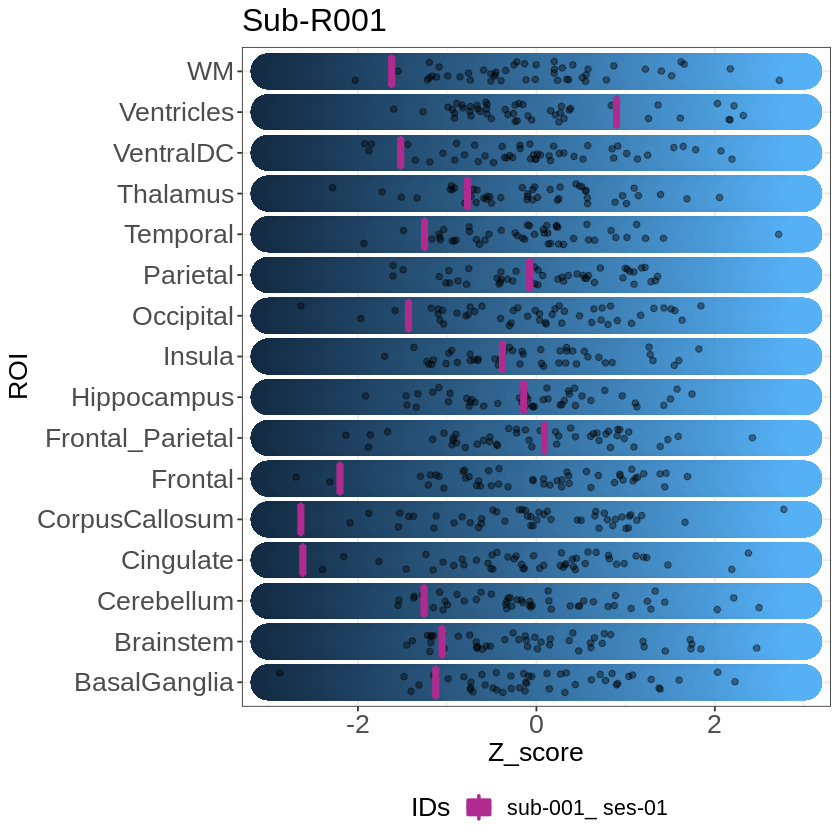

In [272]:
tmp_normz <- znormdata %>%
gather(key='rois',value='z_score', 'Frontal':'Brainstem')

tmp_zdata_s <- zdata_s %>%
gather(key='rois',value='z_score', 'Frontal':'Brainstem')

ids= unique(tmp_zdata_s$ids)

pl <- ggplot(tmp_normz, aes(x=rois, y=z_score), alpha=0.4, width = 0.25) +
    #geom_rect(aes(ymin=-1, ymax=+1, xmin=-Inf, xmax=Inf))+
#geom_rect(aes(ymin=-2.5, ymax=+-1, xmin=-Inf, xmax=Inf))+
#geom_rect(aes(ymin=1, ymax=2.5, xmin=-Inf, xmax=Inf))+
    #geom_tile(data=df_tile, aes(x = factor(rois), y = 1, height = Inf, width = 0.8), alpha = 0.3) +
    geom_link(aes(x = rois, xend=rois, y = -3, yend=3, colour = stat(index)), lineend = "round", size = 10, show.legend = F)+
    geom_jitter(data=tmp_normz%>% filter(LR=='L'), aes(x=rois, y=z_score), alpha=0.4, width = 0.25)+
    new_scale_color() +
    ylim(-3,+3)

n = 0.0
 for (i in ids) {
     pl <- pl + geom_boxplot(data=tmp_zdata_s %>% filter(LR=='L', ids==i), aes(x=rois, y=z_score, fill=ids, color=ids), size=1)
     }

     pl <- pl+    
scale_fill_viridis_d('IDs',option='plasma', begin=0.4)+
scale_color_viridis_d('IDs', option='plasma', begin=0.4)+
    coord_flip() +
    theme_bw() +
    labs(title='Sub-R001', x='ROI', y='Z_score') + 
    theme(legend.position="bottom",
         axis.text.x = element_text(size=16),
         axis.text.y = element_text(size=16),
         text = element_text(size=16))
pl

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Warning message:
“Removed 4 rows containing missing values (geom_point).”


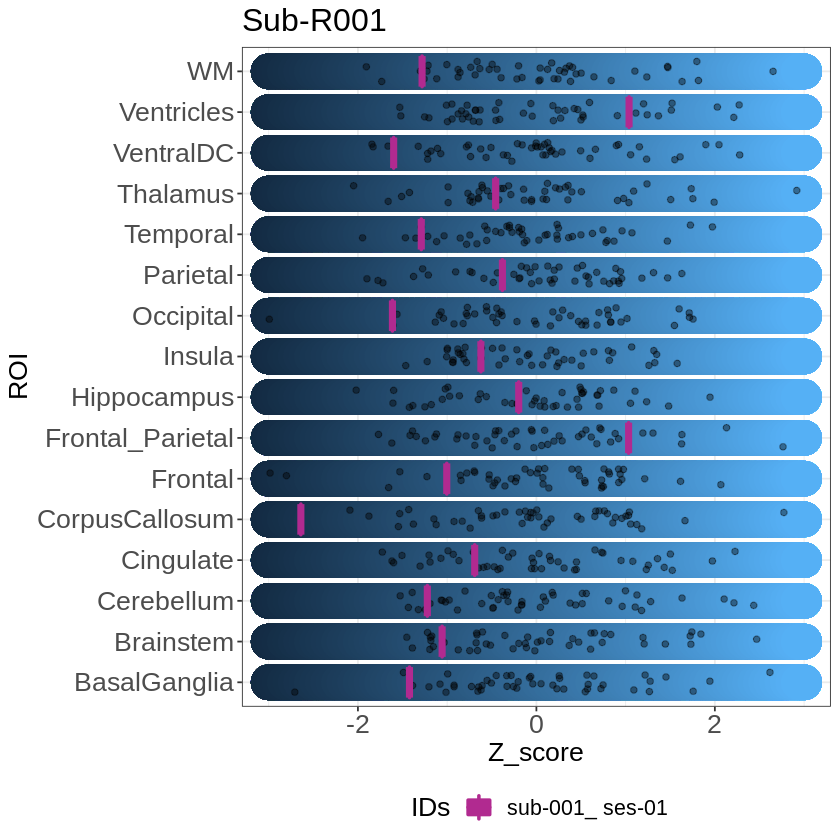

In [273]:
pr <- ggplot(tmp_normz, aes(x=rois, y=z_score), alpha=0.4, width = 0.25) +
    #geom_rect(aes(ymin=-1, ymax=+1, xmin=-Inf, xmax=Inf))+
#geom_rect(aes(ymin=-2.5, ymax=+-1, xmin=-Inf, xmax=Inf))+
#geom_rect(aes(ymin=1, ymax=2.5, xmin=-Inf, xmax=Inf))+
    #geom_tile(data=df_tile, aes(x = factor(rois), y = 1, height = Inf, width = 0.8), alpha = 0.3) +
    geom_link(aes(x = rois, xend=rois, y = -3, yend=+3, colour = stat(index)), lineend = "round", size = 10, show.legend=F)+
    geom_jitter(data=tmp_normz%>% filter(LR=='R'), aes(x=rois, y=z_score), alpha=0.4, width = 0.25)+
    new_scale_color() +
    ylim(-3,+3)

for (i in ids) {
    pr <- pr + geom_boxplot(data=tmp_zdata_s %>% filter(LR=='R', ids==i), aes(x=rois, y=z_score, fill=ids, color=ids), size=1)
    }
    pr <- pr+    
scale_fill_viridis_d('IDs', option='plasma', begin=0.4)+
scale_color_viridis_d('IDs', option='plasma', begin=0.4)+
    coord_flip() +
    theme_bw() +
    labs(title='Sub-R001', x='ROI', y='Z_score') + 
    theme(legend.position="bottom",
         axis.text.x = element_text(size=16),
         axis.text.y = element_text(size=16),
         text = element_text(size=16))
pr

Warning message:
“Removed 4 rows containing missing values (geom_point).”
Warning message:
“Removed 5 rows containing missing values (geom_point).”


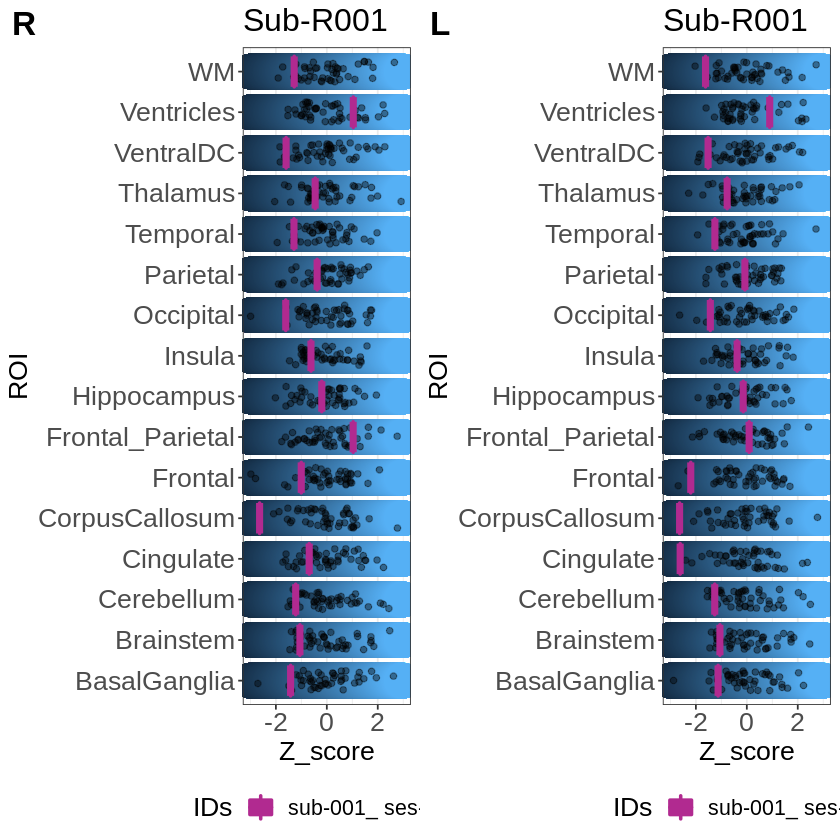

In [274]:
plot_grid(pr, pl, labels = c('R', 'L'), label_size = 20)

In [259]:
ggsave('./imgs/slideplot_sub001.png', plot=last_plot(), width=600, height=300, units='mm')

In [276]:
ggsave('./imgs/slideplot_sub-R001.eps', plot=last_plot(), width=600, height=300, dpi=600, units='mm', device=cairo_ps)